In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize, fftpack
from scipy.integrate import odeint
import pandas as pd
from matplotlib.colors import LogNorm

1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

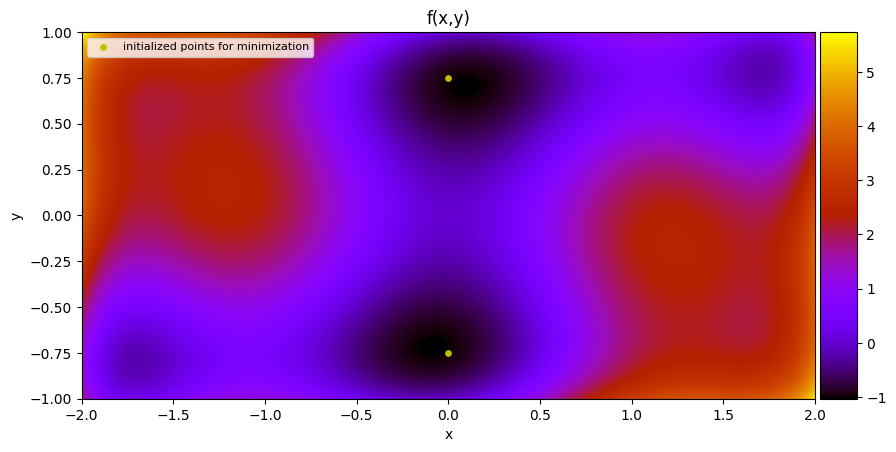

As we can notice from the plot that the function is minimal in the darkest region

Result of minimization with initialization (0.0,0.75):
Minimum found: f([-0.08984202  0.71265641]) = -1.0316284534898768

Result of minimization with initialization (0.0,-0.75):
Minimum found: f([ 0.08984201 -0.71265642]) = -1.0316284534898743

The two minimization lead to the same minima which is the global minimum

Result of minimization with initialization (0,0):
Minimum found: f([0. 0.]) = 0.0

For an initialization (0,0), the minimization leads to a local minimum.


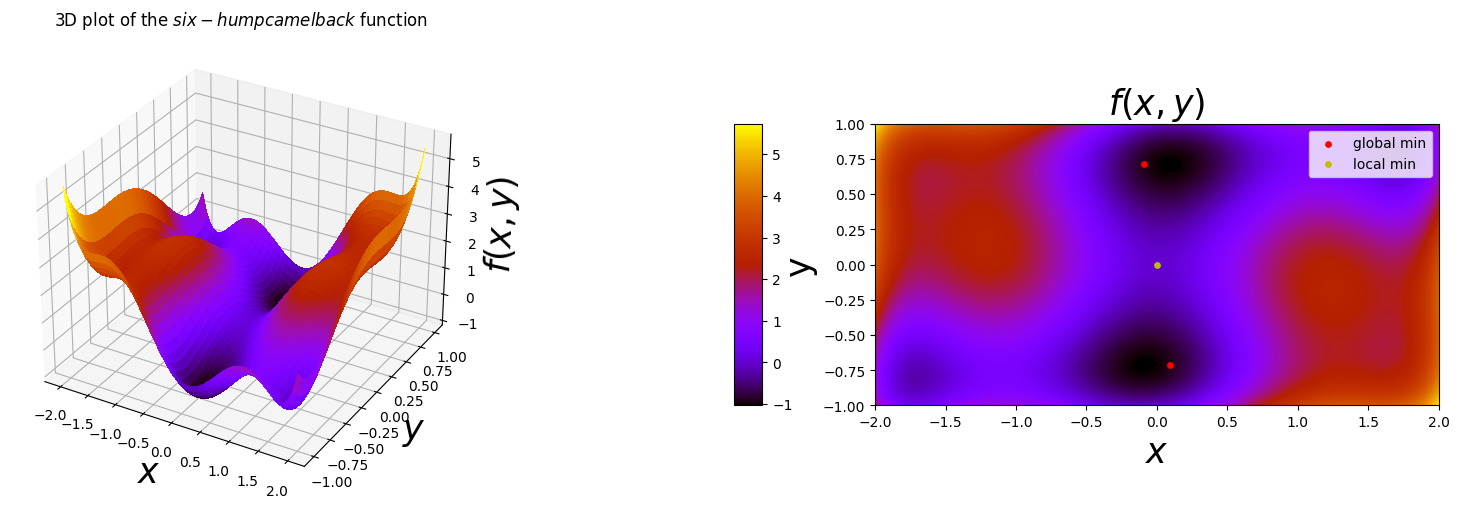

In [2]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

def f(X):
    return (4 - 2.1*X[0]**2 + (X[0]**4)/3)*X[0]**2 + X[0]*X[1] + (4*X[1]**2 - 4)*X[1]**2

x = np.arange(-2,2,0.01)
y = np.arange(-1,1,0.01)
X, Y  = np.meshgrid(x, y)


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
h = ax.imshow(f((X,Y)), extent=[-2, 2, -1, 1], cmap = "gnuplot")
ax.set_title('f(x,y)')
ax.set_xlabel('x')
ax.set_ylabel('y')

# initializing 2 points for minimization 
ax.scatter(0.0, 0.75, s = 15, c = 'y', marker = 'o', label="initialized points for minimization")
ax.scatter(0.0, -0.75, s = 15, c = 'y', marker = 'o')
ax.legend(loc='upper left', prop={'size': 8})
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(h, cax=cax)
plt.show()

print('As we can notice from the plot that the function is minimal in the darkest region')

# Minimization with scipy.optimize
f_min0 = optimize.minimize(f, (0,0))
f_min1 = optimize.minimize(f, (0.0,0.75))
f_min2 = optimize.minimize(f, (0.0,-0.75))

print('\nResult of minimization with initialization (0.0,0.75):')
print('Minimum found: f({}) = {}'.format(f_min1.x, f_min1.fun))
print('\nResult of minimization with initialization (0.0,-0.75):')
print('Minimum found: f({}) = {}'.format(f_min2.x, f_min2.fun))
print('\nThe two minimization lead to the same minima which is the global minimum')
print('\nResult of minimization with initialization (0,0):')
print('Minimum found: f({}) = {}'.format(f_min0.x, f_min0.fun))
print("\nFor an initialization (0,0), the minimization leads to a local minimum.")

# Plotting the function with the global and local minimums
fig2 = plt.figure(figsize=(20, 6))
ax1 = fig2.add_subplot(122)
h = ax1.imshow(f((X,Y)), extent=[-2, 2, -1, 1], cmap = "gnuplot")
ax1.set_title('$f(x,y)$', size=25)
ax1.set_xlabel('$x$', size=25)
ax1.set_ylabel('y', size=25)
ax1.scatter(f_min1.x[0], f_min1.x[1], s = 15, c = 'r', marker = 'o', label="global min")
ax1.scatter(f_min2.x[0], f_min2.x[1], s = 15, c = 'r', marker = 'o')
ax1.scatter(f_min0.x[0], f_min0.x[1], s = 15, c = 'y', marker = 'o', label="local min")
ax1.legend(loc='best')
divider = make_axes_locatable(ax1)
cax = divider.append_axes("left", size="5%")
plt.colorbar(h, cax=cax)

# 3d surface plot 
Z = f((X,Y))
ax2 = fig2.add_subplot(121, projection='3d')
surf = ax2.plot_surface(X, Y, Z, cmap="gnuplot", linewidth=0, antialiased=False)

ax2.set_xlabel('$x$', size=25)
ax2.set_ylabel('$y$', size=25)
ax2.set_zlabel('$f(x, y)$', size=25)
ax2.set_title('3D plot of the $six-hump camelback$ function')
plt.show()

2\. **Non-linear ODE: the damped pendulum**

The equation of the motion that a pendulum makes with respect to the angle $\theta$ with the vertical is given by:

$$\frac{d^2\theta}{dt^2} = -\frac{1}{Q} \frac{d\theta}{dt} + \sin\theta + d \cos\Omega t$$

where $t$ is time, $Q$ is the damping factor, $d$ is the forcing amplitude, and $\Omega$ is the driving frequency of the forcing. 

This second order ODE needs to be written as two coupled first order ODEs defining a new variable $\omega \equiv d\theta/dt$:

$$\frac{d\theta}{dt} = \omega$$
$$\frac{d\omega}{dt} = -\frac{1}{Q}\,\omega + \sin\theta + d \cos\Omega t$$

Consider the initial conditions $\theta_0 = \omega_0 = 0$, and $Q = 2.0$, $d = 1.5$, and $\omega = 0.65$.

 - Solve the ODE with `odeint` over a pariod of 200 time steps
 - Create two plots, one of $\theta$ as a function of the time, and $\omega$ as a function of the time
 - **Optional**: determine if there is a set of parameters for which the motion is chaotic.

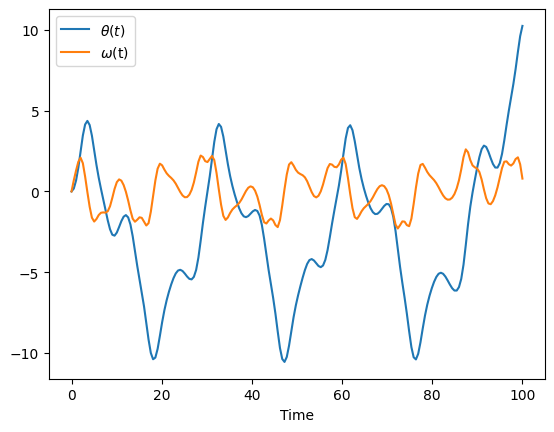

In [10]:
def derivative(v, t, Q, d, Ω):
    θ, w = v
    dθ_dt = w
    dw_dt = -(1/Q) * w + np.sin(θ) + d * np.cos(Ω * t)
    return dθ_dt, dw_dt


v0 = [0, 0]
parameters = (2.0, 1.5, 0.65)
t = np.linspace(0, 100, 200)

# Solve the ODE
solution = odeint(derivative, v0, t, args=parameters)
θ, w = solution[:,0], solution[:,1]

# Plot theta and omega as functions of time
plt.plot(t, θ, label=r"$\theta(t)$")
plt.plot(t, w, label=r"$\omega$(t)")
plt.xlabel('Time')
plt.legend()
plt.show()

3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

The dataset is the one dowloaded at the beginning of Lecture 06:

 - `!wget https://www.dropbox.com/s/ebe1cnyd2gm836a/populations.txt -P data/`

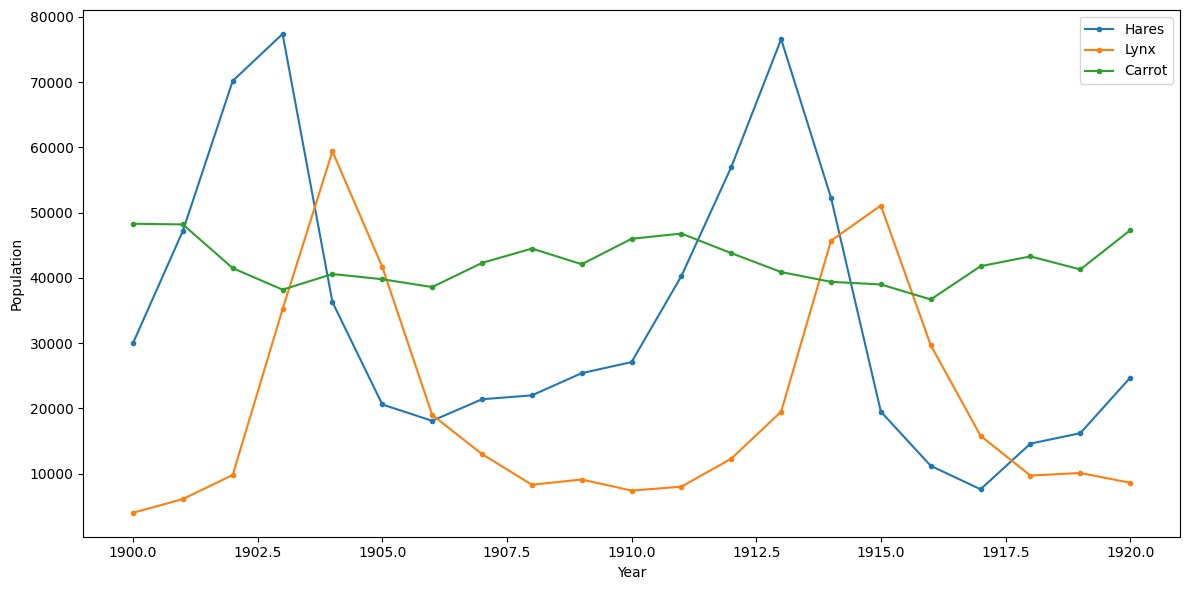

In [26]:
filename = 'data/populations.txt'
df = pd.read_csv(filename, sep='\t')
gdf = df.groupby('# year').mean()

date = gdf.index.to_numpy()
hare = gdf['hare'].to_numpy()
lynx = gdf['lynx'].to_numpy()
carrot = gdf['carrot'].to_numpy()

plt.figure(figsize=(12, 6))
plt.plot(date, hare, marker='.', label='Hares')
plt.plot(date, lynx, marker='.', label='Lynx')
plt.plot(date, carrot, marker='.', label='Carrot')
# plt.ylim(-10, 40)
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.tight_layout()

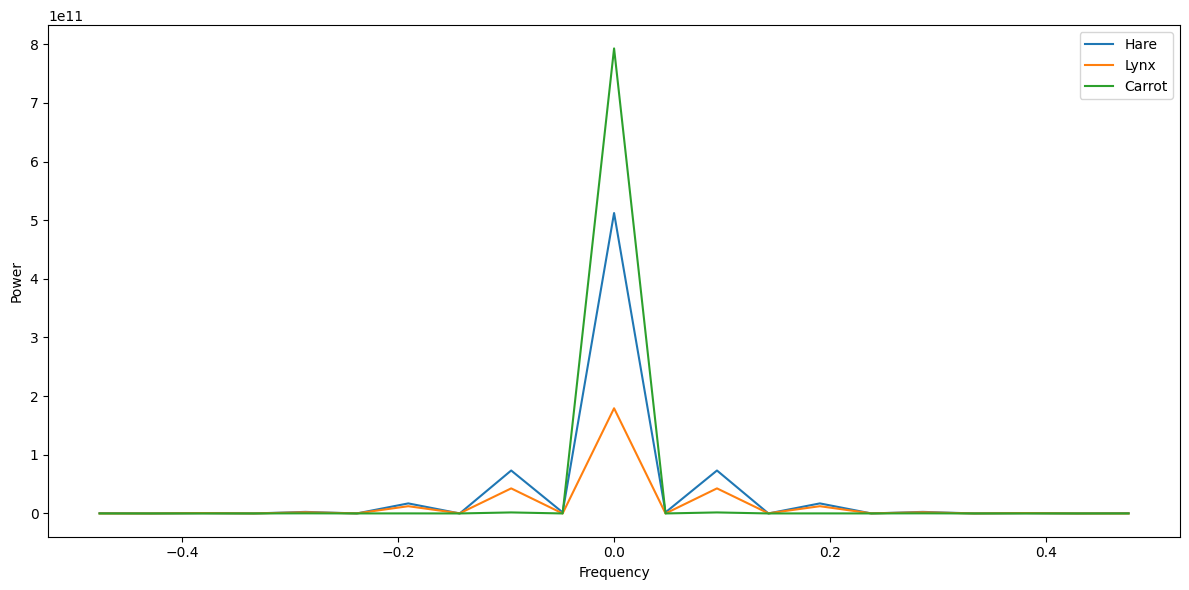

In [39]:
# The FFT and power of the populations
hares_fft, hares_fft_power = fftpack.fft(hare), np.abs(fftpack.fft(hare))**2
lynxes_fft, lynxes_fft_power =  fftpack.fft(lynx), np.abs(fftpack.fft(lynx))**2
carrots_fft, carrots_fft_power =  fftpack.fft(carrot), np.abs(fftpack.fft(carrot))**2

# The return the corresponding frequencies
sample_freq = fftpack.fftfreq(len(hares_fft_power))

# Plot the FFT power
plt.figure(figsize=(12,6))
plt.plot(fftpack.fftshift(sample_freq), fftpack.fftshift(hares_fft_power))
plt.plot(fftpack.fftshift(sample_freq), fftpack.fftshift(lynxes_fft_power))
plt.plot(fftpack.fftshift(sample_freq), fftpack.fftshift(carrots_fft_power))
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.legend(('Hare', 'Lynx', 'Carrot'), loc='best')
plt.tight_layout()

In [50]:
def filter_signal(date, variable, name, fun_fft, color):
    
    power = np.abs(fun_fft)**2

    # Find the peak frequency: focus only on the positive frequencies
    pos_mask = np.where(sample_freq > 0)
    freqs = sample_freq[pos_mask]

    # find the max of freqs array
    peak_freq = freqs[power[pos_mask].argmax()]
    print("Peak frequency " + name + ' : ', peak_freq)

    # filter (set to zero) all high frequency components that are larger than peak_freq
    fun_high_freq_fft = fun_fft.copy()
    fun_high_freq_fft[np.abs(sample_freq) > peak_freq] = 0

    # calculate the Inverse Fast Fourier Transform
    filtered_sig = fftpack.ifft(fun_high_freq_fft)
    
    # only take the real part
    real_filtered_signal = np.real(filtered_sig)

    # plot the result of the IFFT
    plt.plot(date, variable, alpha=0.5, label='Original signal ' + name, color=color)
    plt.plot(date, real_filtered_signal, alpha=0.5, ls='--',ms=25, label='Filtered signal ' + name, color=color)
    plt.xlabel('Time [year]')
    plt.ylabel('Amplitude')
    plt.legend(loc='best')

Peak frequency hare :  0.09523809523809523
Peak frequency carrot :  0.09523809523809523
Peak frequency lynx :  0.09523809523809523


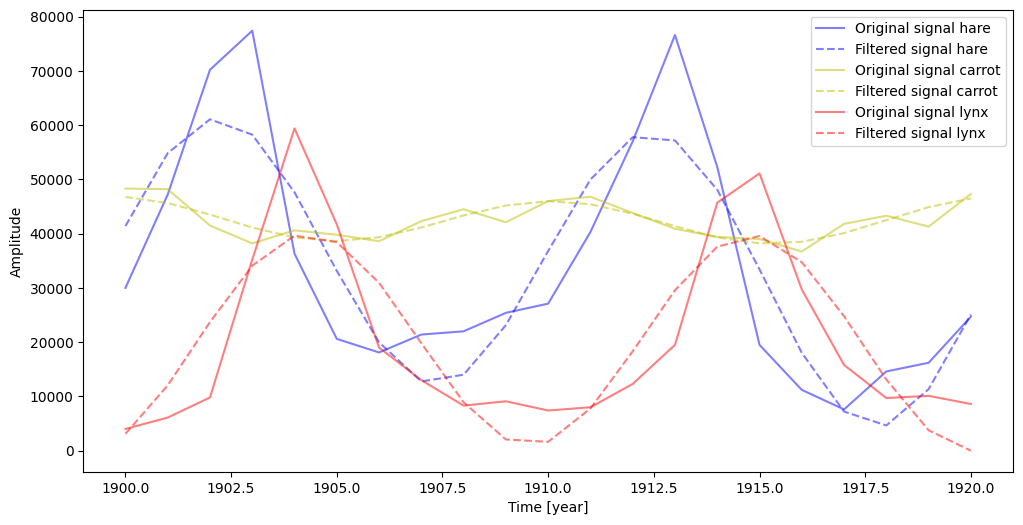

In [51]:
plt.figure(figsize=(12,6))
filter_signal(date, hare, 'hare', hares_fft, 'b')
filter_signal(date, carrot, 'carrot', carrots_fft, 'y' )
filter_signal(date, lynx, 'lynx', lynxes_fft, 'r')

4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("images/moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise.
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
* Apply the inverse Fourier transform to plot the resulting image.

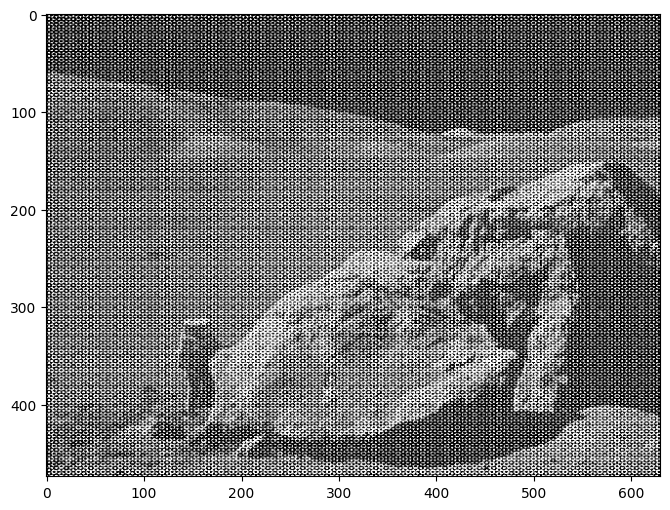

In [58]:
plt.figure(figsize=(12,6))
image = plt.imread('images/moonlanding.png')

plt.imshow(image, plt.cm.gray)

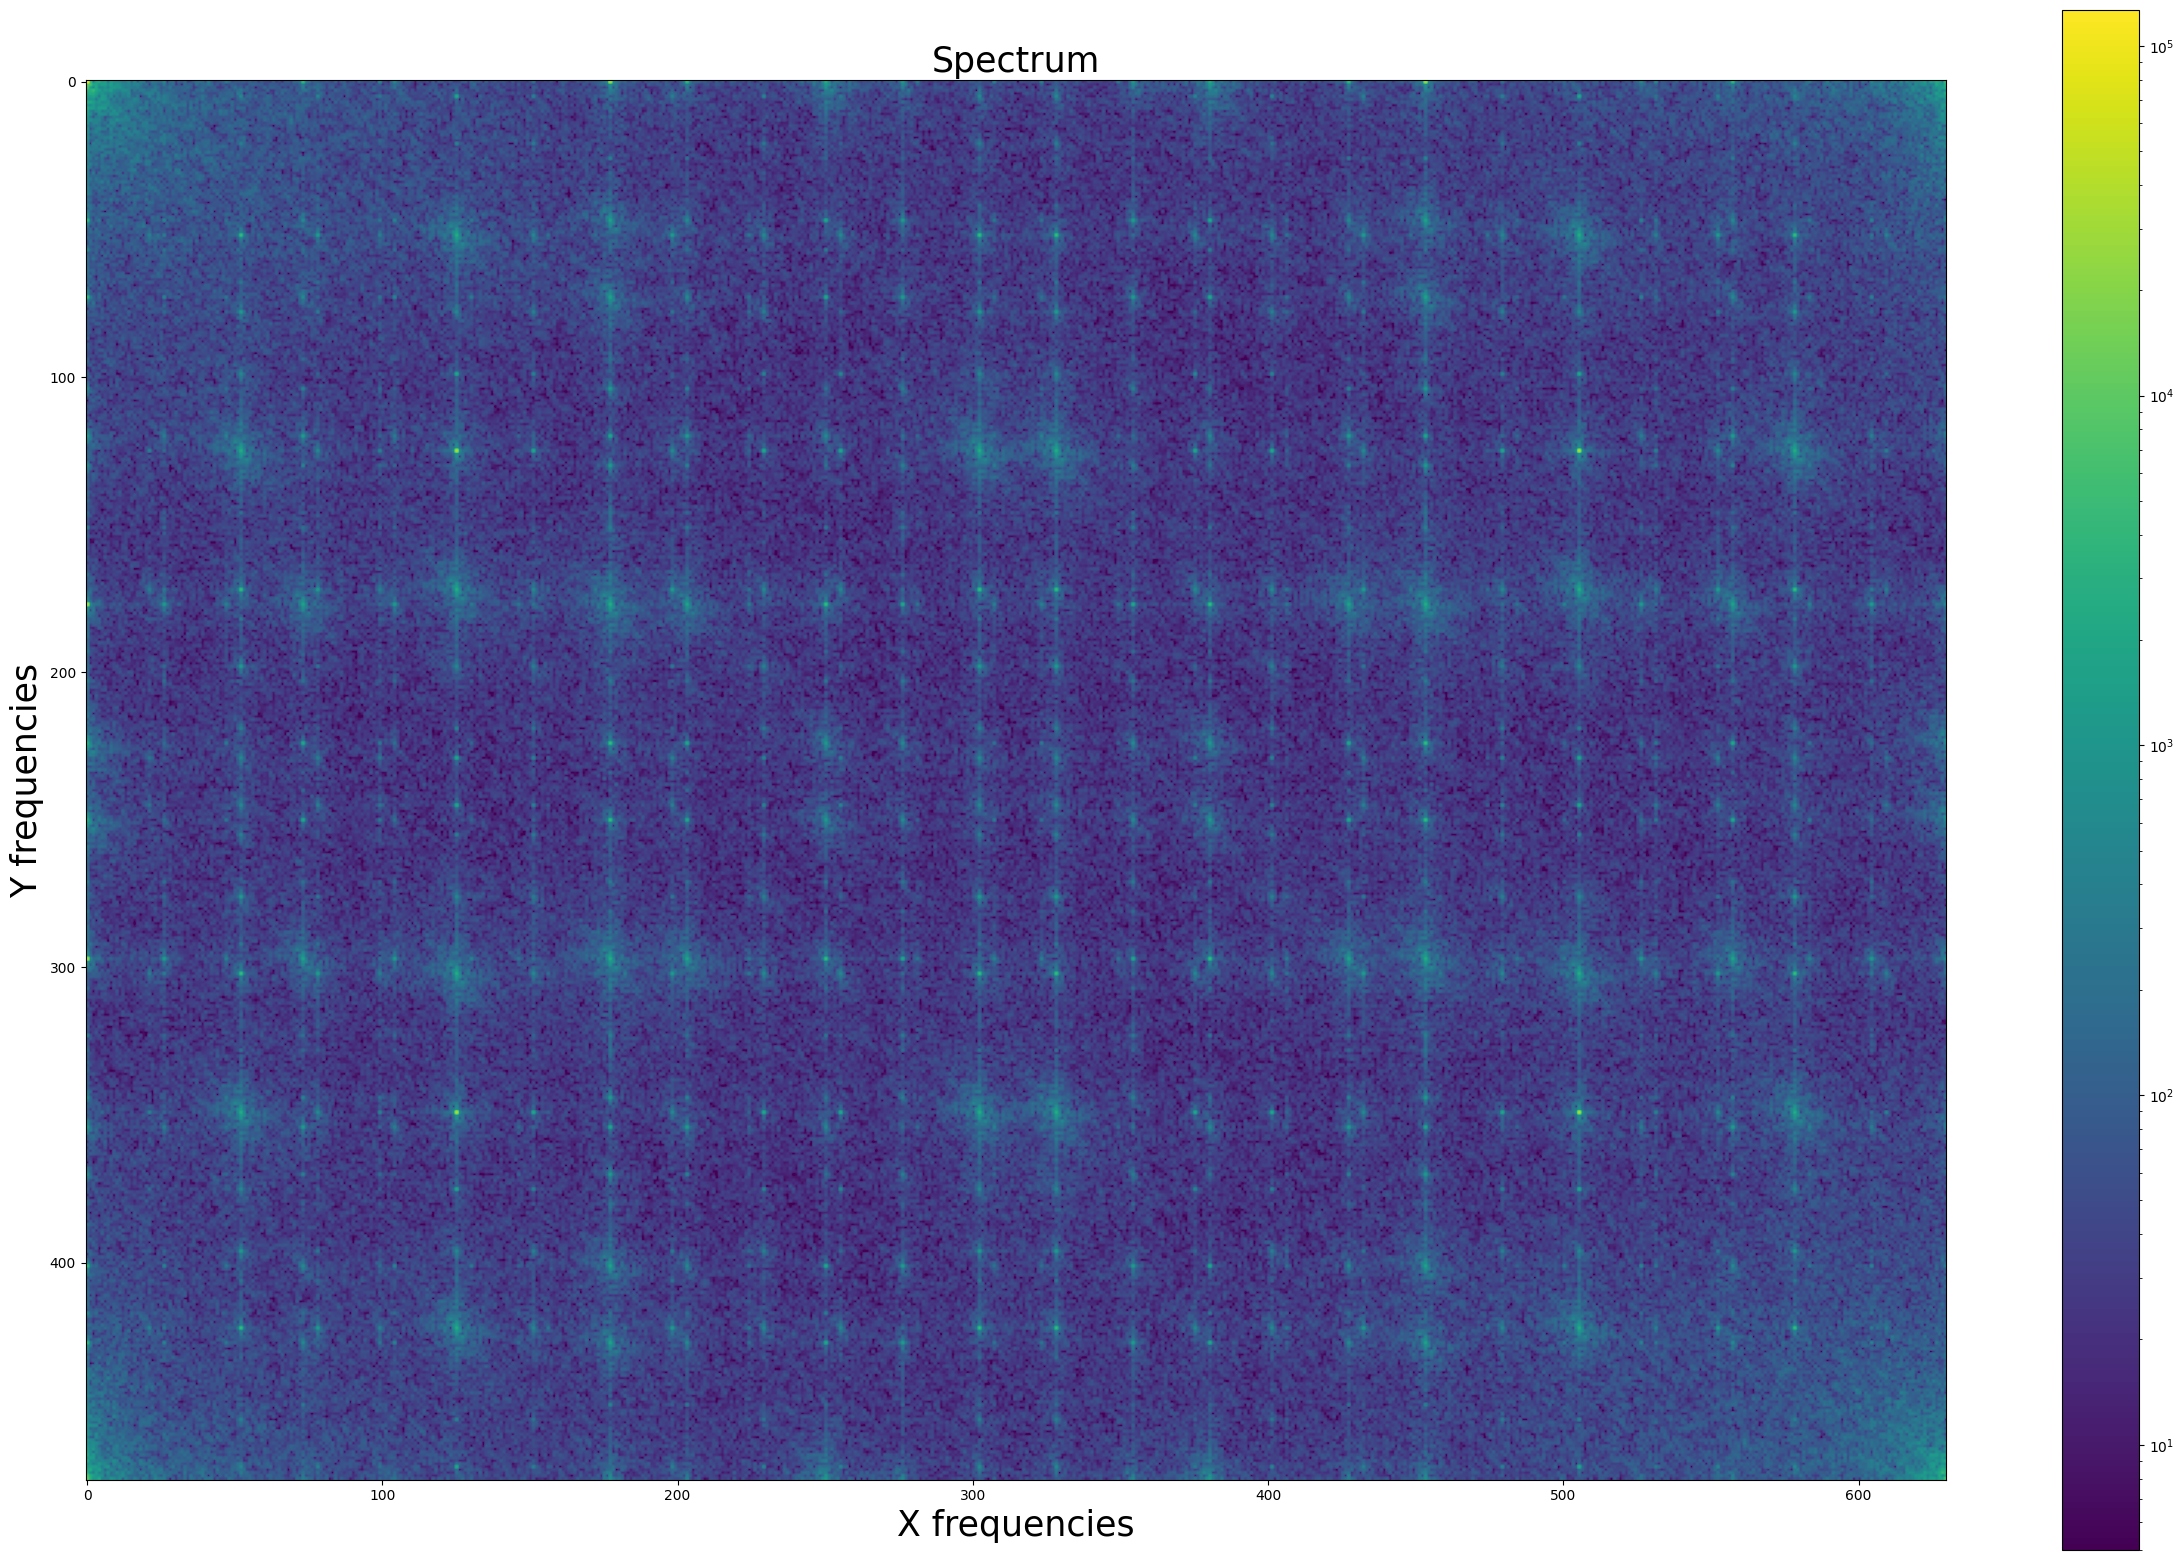

In [61]:
fft_image = fftpack.fft2(image)

# Plot the spectrum (Fourier transform of) the image
plt.figure(figsize=(30,20))
sepctrum = plt.imshow(np.abs(fft_image), norm=LogNorm(vmin=5))
plt.title('Spectrum', size=25)
plt.xlabel('X frequencies', size=25)
plt.ylabel('Y frequencies', size=25)
plt.colorbar(sepctrum)


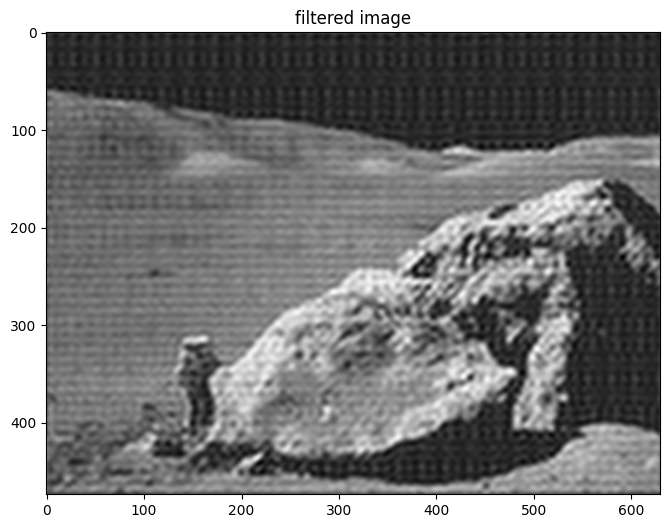

In [68]:
p = 0.2 # (1-p)*100 = pourcentage of filtering

# Create a copy of the FFT
filtered_fft_image = fft_image.copy()

# Set to zero all rows and columns with indices between xmax*p/2 and ymax*(1-p/2):
x, y = filtered_fft_image.shape[0], filtered_fft_image.shape[1]
filtered_fft_image[int(x*p/2):int(x*(1-p/2))] = 0
filtered_fft_image[:, int(y*p/2):int(y*(1-p/2))] = 0

# Calculate the IFFT
filtered_image_ifft = fftpack.ifft2(filtered_fft_image)

# Only take the real part and plot the result of the IFFT
fig = plt.figure(figsize=(12,6))
plt.imshow(filtered_image_ifft.real, plt.cm.gray)
plt.title('filtered image')
plt.show()